In [9]:
%pylab inline

import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pickle

%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("x.pkl", 'rb') as picklefile: 
    x = pickle.load(picklefile)

with open("y.pkl", 'rb') as picklefile: 
    y = pickle.load(picklefile)

with open("patientdata.pkl", 'rb') as picklefile: 
    patientdata = pickle.load(picklefile)

In [3]:
with open("y_train.pkl", 'rb') as picklefile: 
    y_train = pickle.load(picklefile)

with open("y_test.pkl", 'rb') as picklefile: 
    y_test = pickle.load(picklefile)

with open("x_train.pkl", 'rb') as picklefile: 
    x_train = pickle.load(picklefile)

with open("x_test.pkl", 'rb') as picklefile: 
    x_test = pickle.load(picklefile)

with open("x_train_scaled.pkl", 'rb') as picklefile: 
    x_train_scaled = pickle.load(picklefile)

with open("x_test_scaled.pkl", 'rb') as picklefile: 
    x_test_scaled = pickle.load(picklefile)
    
with open("x_scaled.pkl", 'rb') as picklefile: 
    x_scaled = pickle.load(picklefile)

with open("patientdataICD9.pkl", 'rb') as picklefile: 
    patientdataICD9 = pickle.load(picklefile)

In [11]:
# pulling these in from pickle now

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [4]:
# using the scaled x-train and x-test because it's SVM

x_train = x_train_scaled
x_test = x_test_scaled

In [12]:
# check out class_weight="balanced"

linearSVMmodel = svm.LinearSVC(class_weight="balanced")
linearSVMmodel.fit(x_train, y_train)

y_pred = linearSVMmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

# Previous values from scaling before split:

#Accuracy: 0.555
#             precision    recall  f1-score   support

#        <30       0.24      0.20      0.22      2839
#        >30       0.48      0.44      0.46      8887
#         NO       0.65      0.70      0.67     13716

#avg / total       0.54      0.55      0.55     25442


Accuracy: 0.555
             precision    recall  f1-score   support

        <30       0.24      0.20      0.22      2839
        >30       0.48      0.44      0.46      8887
         NO       0.65      0.70      0.67     13716

avg / total       0.54      0.55      0.55     25442



In [20]:
# check out class_weight="balanced"
RBFSVMmodel = svm.SVC(class_weight="balanced")
RBFSVMmodel.fit(x_train, y_train)

y_pred = RBFSVMmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.520
             precision    recall  f1-score   support

        <30       0.21      0.38      0.27      2839
        >30       0.48      0.43      0.45      8887
         NO       0.68      0.61      0.64     13716

avg / total       0.56      0.52      0.53     25442



For kernel RBF SVM:

Accuracy: 0.520
             precision    recall  f1-score   support

        <30       0.21      0.38      0.27      2839
        >30       0.48      0.43      0.45      8887
         NO       0.68      0.61      0.64     13716

avg / total       0.56      0.52      0.53     25442


#### SMOTE:

In [13]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

#### Linear SVM with SMOTE:

In [7]:
# x_train_smote, y_train_smote

linearSVMmodel = svm.LinearSVC(class_weight="balanced")
linearSVMmodel.fit(x_train_smote, y_train_smote)

y_pred = linearSVMmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.485
             precision    recall  f1-score   support

        <30       0.19      0.45      0.27      2839
        >30       0.45      0.37      0.41      8887
         NO       0.68      0.57      0.62     13716

avg / total       0.54      0.48      0.50     25442



#### Kernel RBF SVM with SMOTE:

In [ ]:
# check out class_weight="balanced"
RBFSVMmodel = svm.SVC(class_weight="balanced")
RBFSVMmodel.fit(x_train_smote, y_train_smote)

y_pred = RBFSVMmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

#### Random undersampling:

In [10]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

#### Linear SVM with random undersampling:

In [11]:
# x_train_smote, y_train_smote

# using class_weight="balanced" is not actually necessary here
# since the samples are equal now, but hopefully it's not hurting anything

linearSVMmodel = svm.LinearSVC(class_weight="balanced")
linearSVMmodel.fit(x_train_undersampled, y_train_undersampled)

y_pred = linearSVMmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.489
             precision    recall  f1-score   support

        <30       0.20      0.45      0.28      2839
        >30       0.44      0.38      0.41      8887
         NO       0.68      0.57      0.62     13716

avg / total       0.54      0.49      0.51     25442



#### Kernel RBF SVM with random undersampling:

In [12]:
# check out class_weight="balanced"
RBFSVMmodel = svm.SVC(class_weight="balanced")
RBFSVMmodel.fit(x_train_undersampled, y_train_undersampled)

y_pred = RBFSVMmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.515
             precision    recall  f1-score   support

        <30       0.20      0.40      0.27      2839
        >30       0.48      0.37      0.42      8887
         NO       0.67      0.63      0.65     13716

avg / total       0.55      0.51      0.53     25442



#### Polynomial SVC: - move this to the SVM notebook

In [ ]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

#linearsvc = LinearSVC()
# Do the test 10 times with a LinearSVC and get the average score
#quick_test_afew_times(linearsvc, X, y1)

In [ ]:
svc = SVC()
quick_test_afew_times(svc, x, y)

In [ ]:
quick_test_afew_times(svc, x, y)
model.fit(x_train, y_train)
model.score(x_test, y_test)

# Load in data

We're using a small digit dataset included in sklearn. If you want to try something more challenging for the model, check out the mnist dataset
```python
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=custom_data_home)
```

However, MNIST is relatively large (55MB) and training SVCs scales quadratically with the number of observations, so, in the interest of time and our wifi router, we'll stick with the smaller, included one.

This is from [sklearn.datasets](http://scikit-learn.org/stable/datasets/index.html). It's just a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [2]:
from sklearn import datasets

# the digits object allows you to access the individual images and the flattened vector format of them
digits = datasets.load_digits()
print(
    f"""shape of digits.data: {digits.data.shape}
shape of digits.data[0]: {digits.data[0].shape}
shape of digits.images[0]: {digits.images[0].shape}""")

shape of digits.data: (1797, 64)
shape of digits.data[0]: (64,)
shape of digits.images[0]: (8, 8)


# Data exploration

First, we'll do some basic data exploration. We'll plot our images twice, first just looking at raw values and second using a spline to interpolate (this smoothes the image so human eyes can better interpret it).

Next, we'll plot the data using PCA. This lets us use represent the 64 dimension vector using a 2 dimensional projection. We'll talk more about PCA and other dimensionality reduction techniques later in the course.

In [3]:
def plot_images(x, **kwargs):
    """Handy function for plotting images
    
    x: an array of n images of shape [n, ...]
    kwargs: keyword arguments passed to plt.imshow( aspect="equal", **kwargs)
    
    """
    
    x = x.reshape(x.shape[0],-1)
    im_indices = np.random.choice(len(x), 20)
    pix_dim = int(np.sqrt(x.shape[-1]))
    fig, axes = subplots(
        nrows=4,
        ncols=5,
        figsize=(5, 5),
        sharex=True,
        sharey=True,
        frameon=False)
    for i, ax in enumerate(axes.flat):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        curr_i = im_indices[i]
        ax.imshow(x[curr_i].reshape(pix_dim,pix_dim), aspect="equal", **kwargs)

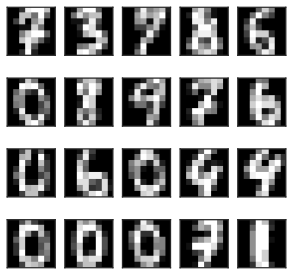

In [4]:
plot_images(digits.images, cmap="gray")

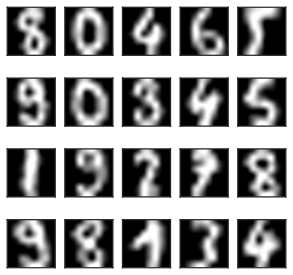

In [5]:
plot_images(digits.images, cmap="gray", interpolation="spline16")

In [6]:
from sklearn import model_selection, preprocessing

# Center the data before the CV split (so that test and train are centered on the same scale)
# this step is important for both PCA and SVM

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    digits.data, digits.target, test_size=0.3, stratify=digits.target)

# here we're centering our train and test based on the train mean

train_center = x_train.mean()

x_train = x_train - train_center
x_test = x_test - train_center

In [7]:
pd.Series(y_train).value_counts()

3    128
6    127
5    127
4    127
1    127
9    126
7    125
2    124
0    124
8    122
dtype: int64

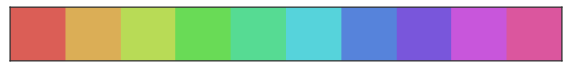

In [8]:
y_colors = seaborn.color_palette("hls", 10)
seaborn.palplot(y_colors)

In [9]:
from sklearn import decomposition

In [10]:
def plot_PCA_2D(data, target):

    pca = decomposition.PCA(n_components=2)
    pca.fit(data)
    pcafeatures = pca.transform(data)
    
    target_labels = unique(target)
    
    
    
    for i, label in enumerate(target_labels):
        plt.scatter(pcafeatures[target == i, 0], pcafeatures[target == i, 1],
                   c=y_colors[i], label=label, alpha=.5, edgecolors="none")
    xlabel("1st pricinple component")
    ylabel("2nd pricinple component")
    legend()

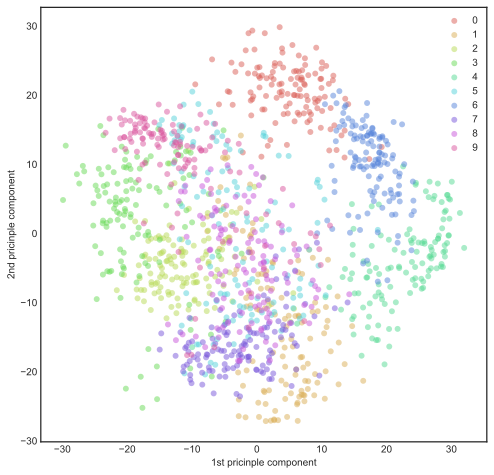

In [11]:
figsize(8,8)
plot_PCA_2D(x_train, y_train)

# Now apply SVM

start with linear

In [12]:
# lin_svm = svm.LinearSVC()
lin_svm = svm.SVC(kernel='linear')
lin_svm.fit(x_train, y_train);

In [13]:
lin_svm.score(x_test, y_test)

0.9907407407407407

In [14]:
param_grid = {
    "C": np.logspace(5,-5,11)
}

lin_grid = model_selection.GridSearchCV(lin_svm, param_grid, verbose=2, cv=5, n_jobs=-1)

In [15]:
lin_grid.fit(x_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] C=100000.0 ......................................................
[CV] C=100000.0 ......................................................
[CV] C=100000.0 ......................................................
[CV] C=100000.0 ......................................................
[CV] ....................................... C=100000.0, total=   0.1s
[CV] ....................................... C=100000.0, total=   0.1s
[CV] C=100000.0 ......................................................
[CV] C=10000.0 .......................................................
[CV] ....................................... C=100000.0, total=   0.1s
[CV] C=10000.0 .......................................................
[CV] ....................................... C=100000.0, total=   0.1s
[CV] C=10000.0 .......................................................
[CV] ....................................... C=100000.0, total=   0.2s
[CV] C=10000.0 .

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s


[CV] ........................................... C=0.01, total=   0.1s
[CV] ........................................... C=0.01, total=   0.1s
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] ........................................... C=0.01, total=   0.1s
[CV] ........................................... C=0.01, total=   0.1s
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] C=0.0001 ........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    4.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.e+05, 1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 1.e-05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [16]:
print(f"""
best params: {lin_grid.best_params_}
best score: {lin_grid.best_score_}
""")


best params: {'C': 0.001}
best score: 0.9729514717581543



In [17]:
lin_grid.score(x_test, y_test)

0.9888888888888889

In [18]:
from sklearn import metrics

In [19]:
y_pred = lin_grid.predict(x_test)
c_mat = metrics.confusion_matrix(y_test,y_pred)
c_mat

array([[53,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 52]])

In [20]:
def plot_confusion(clf, x, y):
    
    y_pred = clf.predict(x)
    c_mat = metrics.confusion_matrix(y,y_pred)
    labels = unique(y)
    seaborn.heatmap(
        sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=False);
    ylabel("true label")
    xlabel("predicted label")

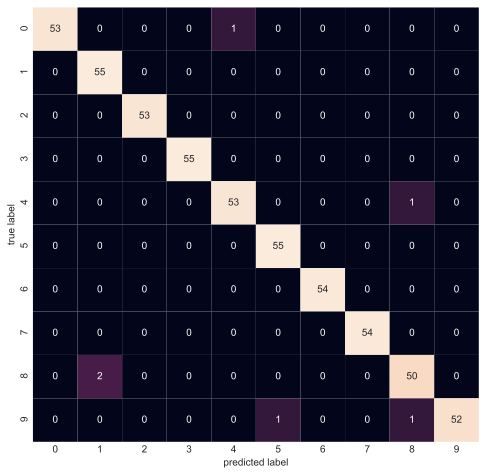

In [21]:
plot_confusion(lin_grid, x_test, y_test)

In [22]:
def plot_decision(x, y, clf, num_points=10000):

    n = np.sqrt(num_points) // 1

    pca = decomposition.PCA(n_components=2)
    x_t = pca.fit_transform(x)

    x0_min, x0_max = x_t[:, 0].min() - 1, x_t[:, 0].max() + 1
    x1_min, x1_max = x_t[:, 1].min() - 1, x_t[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x0_min, x0_max, num=n), np.linspace(x1_min, x1_max, num=n))

    mesh_points = np.concatenate(
        (xx.reshape(-1, 1), yy.reshape(-1, 1)), axis=1)

    x_inv = pca.inverse_transform(mesh_points)
    Z = clf.predict(x_inv)
    Z = Z.reshape(xx.shape)

    c_colors = [y_colors[i] for i in unique(Z)]
    plt.contourf(xx, yy, Z, colors=y_colors, levels=arange(10), alpha=.5)

    target_labels = unique(y)
    for i, label in enumerate(target_labels):
        plt.scatter(
            x_t[y == i, 0],
            x_t[y == i, 1],
            c=y_colors[i],
            label=label,
            alpha=.5,
            edgecolors="black")
    # plt.scatter(mesh_points[:,0], mesh_points[:,1], marker="X")
    xlabel("1st pricinple component")
    ylabel("2st pricinple component")
    legend()

/Users/soph/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


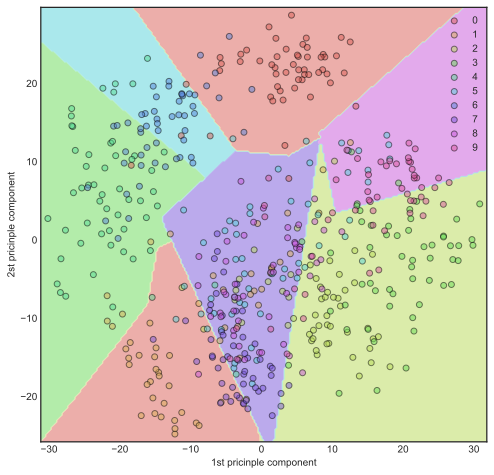

In [23]:
plot_decision(x_test, y_test, lin_grid, num_points=60000)

# Let's do an rbf kernel

In [24]:
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(x_train, y_train)
rbf_svm.score(x_test, y_test)

0.5944444444444444

In [25]:
param_grid = {
    "C": np.logspace(2, -5, 10),
    "gamma": np.logspace(1, -5, 10),
}

rbf_grid = model_selection.RandomizedSearchCV(
    rbf_svm, param_grid, verbose=2, n_jobs=-1, cv=5, n_iter=15)

In [26]:
rbf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] gamma=0.00021544346900318867, C=0.002154434690031882 ............
[CV] gamma=0.00021544346900318867, C=0.002154434690031882 ............
[CV] gamma=0.00021544346900318867, C=0.002154434690031882 ............
[CV] gamma=0.00021544346900318867, C=0.002154434690031882 ............
[CV]  gamma=0.00021544346900318867, C=0.002154434690031882, total=   0.7s
[CV]  gamma=0.00021544346900318867, C=0.002154434690031882, total=   0.6s
[CV] gamma=0.00021544346900318867, C=0.002154434690031882 ............
[CV] gamma=0.464158883361278, C=0.0774263682681127 ...................
[CV]  gamma=0.00021544346900318867, C=0.002154434690031882, total=   0.6s
[CV] gamma=0.464158883361278, C=0.0774263682681127 ...................
[CV]  gamma=0.00021544346900318867, C=0.002154434690031882, total=   0.6s
[CV] gamma=0.464158883361278, C=0.0774263682681127 ...................
[CV]  gamma=0.00021544346900318867, C=0.002154434690031882, total=   0.7s
[

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.2s


[CV] ............... gamma=10.0, C=0.002154434690031882, total=   0.6s
[CV] gamma=0.1, C=1e-05 ..............................................
[CV] ............................... gamma=0.1, C=1e-05, total=   0.7s
[CV] gamma=0.1, C=1e-05 ..............................................
[CV] ............................... gamma=0.1, C=1e-05, total=   0.7s
[CV] gamma=4.641588833612782e-05, C=0.01291549665014884 ..............
[CV] ............................... gamma=0.1, C=1e-05, total=   0.7s
[CV] gamma=4.641588833612782e-05, C=0.01291549665014884 ..............
[CV] ............................... gamma=0.1, C=1e-05, total=   0.7s
[CV] gamma=4.641588833612782e-05, C=0.01291549665014884 ..............
[CV] ............................... gamma=0.1, C=1e-05, total=   0.7s
[CV] gamma=4.641588833612782e-05, C=0.01291549665014884 ..............
[CV]  gamma=4.641588833612782e-05, C=0.01291549665014884, total=   0.6s
[CV] gamma=4.641588833612782e-05, C=0.01291549665014884 ..............
[CV] 

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   19.0s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'C': array([1.00000e+02, 1.66810e+01, 2.78256e+00, 4.64159e-01, 7.74264e-02,
       1.29155e-02, 2.15443e-03, 3.59381e-04, 5.99484e-05, 1.00000e-05]), 'gamma': array([1.00000e+01, 2.15443e+00, 4.64159e-01, 1.00000e-01, 2.15443e-02,
       4.64159e-03, 1.00000e-03, 2.15443e-04, 4.64159e-05, 1.00000e-05])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [27]:
print(f"""
best params: {rbf_grid.best_params_}
best score: {rbf_grid.best_score_}
""")
rbf_grid.best_params_


best params: {'gamma': 0.001, 'C': 2.7825594022071245}
best score: 0.9864757358790772



{'gamma': 0.001, 'C': 2.7825594022071245}

In [28]:
rbf_model = rbf_grid.best_estimator_
rbf_model.fit(x_train,y_train)

SVC(C=2.7825594022071245, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
rbf_grid.score(x_test, y_test)

0.9907407407407407

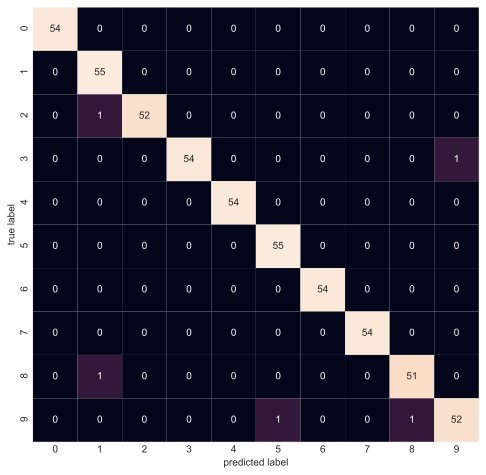

In [30]:
plot_confusion(rbf_model, x_test, y_test)

/Users/soph/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


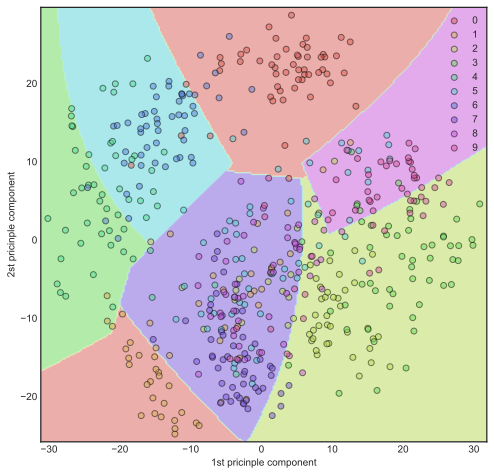

In [31]:
plot_decision(x_test, y_test, rbf_model, num_points=60000)

# Poly kernel

In [32]:
poly_svm = svm.SVC(kernel='poly', gamma='auto')
poly_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
poly_svm.score(x_test, y_test)

0.9944444444444445

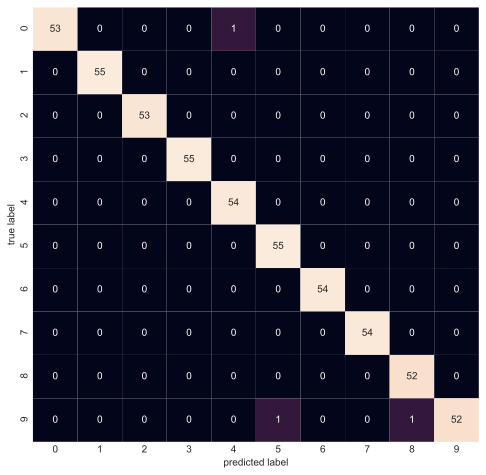

In [34]:
plot_confusion(poly_svm, x_test, y_test)

/Users/soph/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


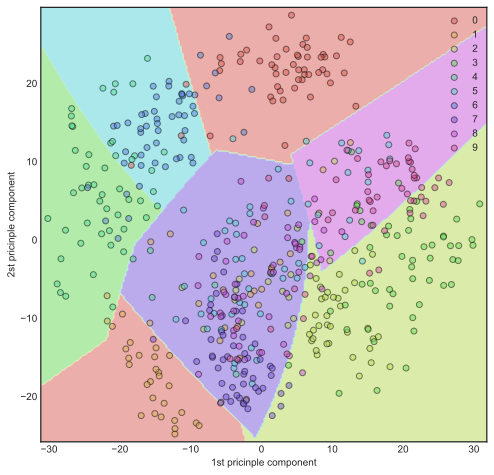

In [37]:
plot_decision(x_test, y_test, poly_svm, num_points=60000)

# MNIST example

here's an example with a much larger dataset. Warning (from sklearn documentation)

![](images/warning.png)

In [56]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [57]:
x = mnist.data
y = mnist.target
x.shape

(70000, 784)

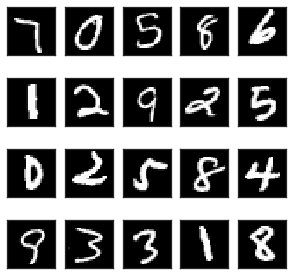

In [58]:
plot_images(x, cmap="gray")

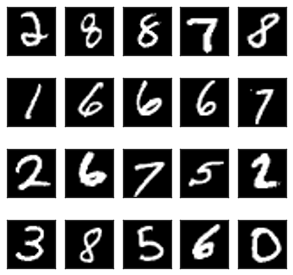

In [60]:
plot_images(x, cmap="gray", interpolation="spline16")

In [62]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, stratify=y)

center = x_train.mean()
x_train = x_train - center
x_test = x_test - center

In [63]:
pd.Series(y_train).value_counts()

1.0    5908
7.0    5470
3.0    5356
2.0    5242
9.0    5218
0.0    5177
6.0    5157
8.0    5119
4.0    5118
5.0    4735
dtype: int64

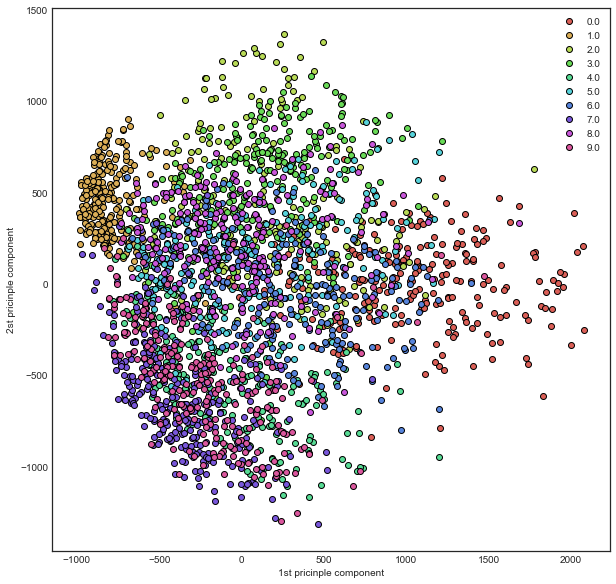

In [66]:
figsize(10,10)
plot_PCA_2D(x_train[::20], y_train[::20])

In [ ]:
skip_size = 10 # skip every n examples
lin_svm = svm.SVC(kernel='linear')
lin_svm.fit(x_train[::skip_size, :], y_train[::skip_size])

In [ ]:
lin_svm.score(x_test[::skip_size,:], y_test[::skip_size])

In [103]:
accuracy_score(y_test[::skip_size],y_pred)

0.91257142857142859

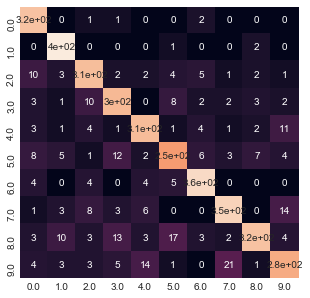

In [104]:
figsize(5, 5)
c_mat = confusion_matrix(y_test[::skip_size],y_pred)
labels = unique(y_test)
seaborn.heatmap(
    sqrt(c_mat),
    annot=c_mat,
    xticklabels=labels,
    yticklabels=labels,
    cbar=False);

In [ ]:
figsize(10,10)
xx,yy = make_meshgrid(pcafeatures_train[:,0], pcafeatures_train[:,1], n=100)

x_inv = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
Z = model_svm4.predict(x_inv)
Z = Z.reshape(xx.shape)
c_colors = [y_colors[i] for i in unique(Z)]
contourf(xx, yy, Z, colors=y_colors, levels=arange(10))
plot_PCA_2D(pcafeatures_train[::10,:], target=y_train[::10])